<a href="https://colab.research.google.com/github/rjrahul24/ga-reinforcement-learning-image-restoration/blob/main/Genetic_Algorithm_for_Image_Reconstruction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install pygad

     |████████████████████████████████| 51kB 4.1MB/s 


In [ ]:
import numpy
import functools
import operator
import matplotlib.pyplot
# Importing imageio to read the input image file
# More information about the pygad PyPI package here: https://pypi.org/project/pygad/
import imageio
import pygad

In [ ]:
input_image = imageio.imread('/content/test_flower.jpg')
input_image = numpy.asarray(input_image/255, dtype=numpy.float)

In [ ]:
# We represent the image as a one-dimensional vector and return it
def image_to_vector(img_array):
    return numpy.reshape(a=img_array, newshape=(functools.reduce(operator.mul, img_array.shape)))
# Convert the one-dimensional vector to an array
def vector_to_array(input_vector, shape):
    # Checking whether reshaping is possible
    if len(input_vector) != functools.reduce(operator.mul, shape):
        raise ValueError("Reshaping failed")
    return numpy.reshape(a=input_vector, newshape=shape)

In [ ]:
# Target image after enconding. Value encoding is used.
image_encode = image_to_vector(input_image)
# We now calculate the fitness value for a solution from the population.
# The sum of absolute differences between individual genes values gives us the fitness value required.
def fitness_func(int_one, int_two):
    fitness_value = numpy.sum(numpy.abs(image_encode-int_one))
    # Negate the fitness value to turn it from decreasing to increasing
    fitness_value = numpy.sum(image_encode) - fitness_value
    return fitness_value

In [ ]:
# Save the output of the run to a new image and enumerate the number of iterations taken
def callback_func(genetic_var):
    if genetic_var.generations_completed % 500 == 0:
        matplotlib.pyplot.imsave('Final_GA_Image_'+str(genetic_var.generations_completed)+'.png', vector_to_array(genetic_var.best_solution()[0], input_image.shape))

# Initiate the Genetic Algorithm class with the given parameters
genetic_var = pygad.GA(num_generations=20999,
                       num_parents_mating=12,                 # Number of Parent Solutions to consider
                       fitness_func=fitness_func,                  # Choosing which fitness function to use
                       init_range_low=0,                               # Lower scale entry point (Should be integer between 0-1)
                       init_range_high=1,                              # Higher scale exit point  (Should be integer between 0-1)
                       sol_per_pop=22,                                 # Number of populations to work through
                       num_genes=input_image.size,         # Number of genes to use
                       mutation_by_replacement=True,    
                       mutation_percent_genes=0.02,        # % of genes from the population that need to be mutated
                       mutation_type="random",                 # Type of mutation
                       callback_generation=callback_func,
                       random_mutation_min_val=0,
                       random_mutation_max_val=1)        # Mutation minimum and maximum values (range 0-1)

/usr/local/lib/python3.7/dist-packages/pygad/pygad.py:632: UserWarning: Starting from PyGAD 2.6.0, the callback_generation parameter is deprecated and will be removed in a later release of PyGAD. Please use the on_generation parameter instead.
  if not self.suppress_warnings: warnings.warn("Starting from PyGAD 2.6.0, the callback_generation parameter is deprecated and will be removed in a later release of PyGAD. Please use the on_generation parameter instead.")


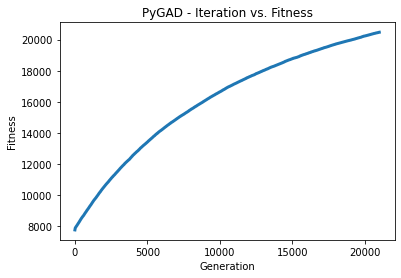

Selected Solution's Fitness Value = 20470.276541358347
Iteration of the Selected Solution : 0
Selected Solution was reached at the 20992 generation.


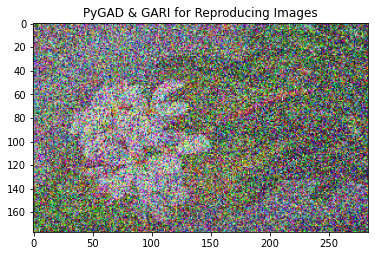

In [ ]:
# Run the GA instance
genetic_var.run()
# Plot the GA run over time to see how image evolved
genetic_var.plot_result()

# We will now see some metrics for the best solution
int_one, result_fit, int_two = genetic_var.best_solution()
print("Selected Solution's Fitness Value = {result_fit}".format(result_fit=result_fit))
print("Iteration of the Selected Solution : {int_two}".format(int_two=int_two))
if genetic_var.best_solution_generation != -1:
    print("Selected Solution was reached at the {best_solution_generation} generation.".format(best_solution_generation=genetic_var.best_solution_generation))
final_result = vector_to_array(int_one, input_image.shape)
matplotlib.pyplot.imshow(final_result)
matplotlib.pyplot.title("PyGAD & GARI for Reproducing Images")
matplotlib.pyplot.show()